In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
path = "C:\\datasets\\spe\\data-latest.xlsx"
df = pd.read_excel(path, sheet_name='Compliance_Revenue', skiprows=1)

In [8]:
# drop rows with nan values
df = df.dropna()
# drop rows where all the values are either 0 or Not available from te 4th column onwards
df = df[(df.iloc[:, 5:] != 'Not available').all(axis=1)]

In [9]:
# drop the rows where the sum of the values in the columns from 4th column onwards is 0
df = df[df.iloc[:, 5:].sum(axis=1) != 0].reset_index(drop=True)
df = df.drop(columns=['Metric'])
df.head()

,Name of the initiative,Instrument Type,Jurisdiction Covered,1990,1991,1992,1993,1994,1995,1996,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Finland carbon tax,Carbon tax,Finland,160.891089,144.124168,111.683849,179.487179,0.000000,0.000000,0.000000,...,1137.056975,1456.482528,1349.6905,1351.745041,1609.414797,1458.572417,1419.493196,1644.440001,1734.450968,1418.64375
1,Poland carbon tax,Carbon tax,Poland,2.065790,1.427680,1.124912,0.856440,0.771435,0.717332,0.808477,...,1.222900,1.211440,1.21144,1.141992,1.326928,1.218041,5.93572,1.219945,6.623094,1.257744
2,Norway carbon tax,Carbon tax,Norway,0.000000,124.805513,280.827556,311.907280,417.033268,398.163615,414.864402,...,1247.205259,1500.435962,1544.153265,1498.541527,1812.839837,1650.773454,1454.77404,1759.786039,2157.497427,1507.941053
3,Sweden carbon tax,Carbon tax,Sweden,0.000000,1408.962186,1205.533338,1362.281768,1522.388060,1713.432119,1796.631562,...,2704.366068,3046.352818,2809.967881,2648.175315,2879.056485,2492.294517,2004.255738,2435.322979,2342.244509,2173.094196
4,Denmark carbon tax,Carbon tax,Denmark,0.000000,0.000000,227.110390,484.298781,611.049724,561.188811,580.660377,...,531.642289,567.737184,567.737184,513.139471,600.653764,534.248688,534.777077,496.418155,467.830983,479.19465


In [5]:
# select the rows where the Area is in the selected_areas list
selected_areas = ['Alberta', 'British Columbia', 'Quebec', 'Northwest Territories', 'Canada', 'Prince Edward Island', 'Newfoundland and Labrador', 'New Brunswick']
df = df[df['Jurisdiction Covered'].isin(selected_areas)].reset_index(drop=True)
df

,Name of the initiative,Instrument Type,Jurisdiction Covered,1990,1991,1992,1993,1994,1995,1996,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Alberta TIER,ETS,Alberta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,66.841104,63.922741,103.931938,101.878702,352.077136,391.861591,301.575556,292.280143,475.943095,638.43937
1,BC carbon tax,Carbon tax,British Columbia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,954.646368,932.015023,920.518127,932.385463,1091.88479,1220.663274,1118.731013,2283.326701,1757.113171,1958.17631
2,Quebec CaT,ETS,Quebec,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.804499,651.101989,257.573524,358.854957,497.597186,726.294493,485.264084,895.901313,1069.373402,1048.802952
3,Northwest Territories carbon tax,Carbon tax,Northwest Territories,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0,0,5.23527,13.336146,25.785913,35.13527,42.858198
4,Canada federal fuel charge,Carbon tax,Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0,0,1461.534329,3010.831877,4777.35774,5895.540281,5719.352693
5,Prince Edward Island Carbon tax,Carbon tax,Prince Edward Island,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0,0,7.047868,9.143982,24.353363,24.034926,10.345082
6,Newfoundland and Labrador carbon tax,Carbon tax,Newfoundland and Labrador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0,0,43.430832,41.042411,78.185436,87.40669,25.862706
7,New Brunswick carbon tax,Carbon tax,New Brunswick,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,0,0,0,87.430534,98.487863,127.877238,118.229513


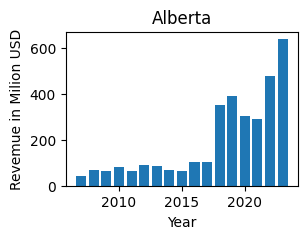

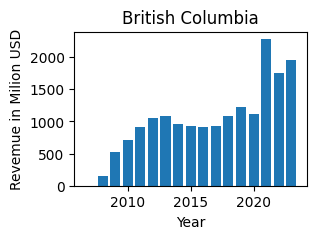

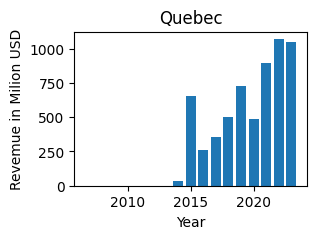

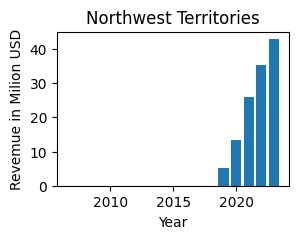

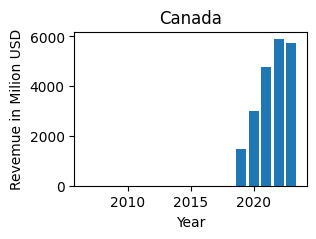

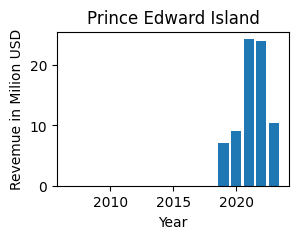

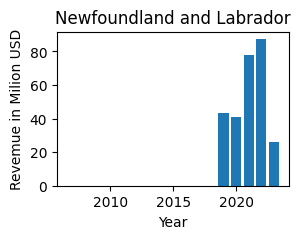

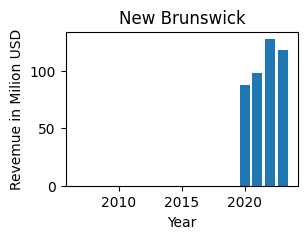

In [6]:
for i in range(0, len(df)):
    plt.bar(df.columns[20:], df.iloc[i, 20:], label=df.iloc[i, 0], figure=plt.figure(figsize=(3, 2)))
    plt.xlabel('Year')
    plt.title(df.iloc[i, 2])
    plt.ylabel('Revemue in Milion USD')
    plt.show()
